# This is hw 5 where we will code our own least squares method!

## We will then compare to the python libraries least square method 


True parameters:
  m = 0.690770723434893  b = 1.3397563767203438

Manual Least Squares:
  m = 0.7629778863844698  b = 1.3324869346063621

NumPy lstsq:
  m = 0.7629778863844682  b = 1.3324869346063621

Largest positive residual:
  X = 0.02  Y = 2.309550815182247  Residual = 0.9618043228481952

Largest negative residual:
  X = 0.53  Y = 0.7087186212663534  Residual = -1.0281465931237779


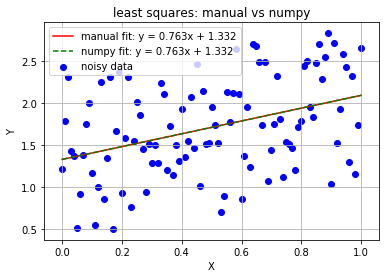

In [2]:
import numpy as np
import math
import time
import matplotlib.pyplot as plt

# generate data
np.random.seed(7)
m_true = np.random.uniform(0.5, 3.0)
b_true = np.random.uniform(-1.0, 2.0)

# the slides said to use your own m and b but I didn't know if this meant to 
# hard code it so I just used some random points so the slopes and y intercept 
#will differ each time you run it. 

# x from 0 to 1 in steps of 0.01
X = np.arange(0, 1.01, 0.01)
noise = np.random.uniform(-1, 1, len(X))

# 
Y = m_true * X + b_true + noise

# manual least squares
n = len(X)
sum_x = np.sum(X)
sum_y = np.sum(Y)
sum_xy = np.sum(X * Y)
sum_x2 = np.sum(X * X)

# 
m_manual = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
c_manual = (sum_y - m_manual * sum_x) / n

# numpy comparison
A = np.vstack([X, np.ones(len(X))]).T
m_np, c_np = np.linalg.lstsq(A, Y, rcond=None)[0]

# residuals
Y_pred = m_manual * X + c_manual
residuals = Y - Y_pred

# 
max_res_idx = np.argmax(residuals)
min_res_idx = np.argmin(residuals)

print("True parameters:")
print(f"  m = {m_true}  b = {b_true}")
print()
print("Manual Least Squares:")
print(f"  m = {m_manual}  b = {c_manual}")
print()
print("NumPy lstsq:")
print(f"  m = {m_np}  b = {c_np}")
print()
print(f"Largest positive residual:")
print(f"  X = {X[max_res_idx]}  Y = {Y[max_res_idx]}  Residual = {residuals[max_res_idx]}")
print()
print(f"Largest negative residual:")
print(f"  X = {X[min_res_idx]}  Y = {Y[min_res_idx]}  Residual = {residuals[min_res_idx]}")

# plot
X_line = np.linspace(X.min(), X.max(), 20)

plt.figure()
plt.scatter(X, Y, color='blue', label='noisy data')
plt.plot(X_line, m_manual * X_line + c_manual, color='red', label=f'manual fit: y = {m_manual:.3f}x + {c_manual:.3f}')
plt.plot(X_line, m_np * X_line + c_np, color='green', linestyle='--', label=f'numpy fit: y = {m_np:.3f}x + {c_np:.3f}')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('least squares: manual vs numpy')
plt.legend()
plt.grid(True)
plt.show()